In [4]:
# LOAD Packages 
#!pip install uproot
#!pip install pandas
#!pip install awkward
#!pip install matplotlib
import uproot
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib
import tqdm
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import os
import math
import csv
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import ROOT
#from ROOT import TFile

In [2]:
# Open File
#edep_sim_file = uproot.open("/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.spill/EDEPSIM_SPILLS/0001000/MiniRun5_1E19_RHC.spill.0001023.EDEPSIM_SPILLS.root")
#edep_sim_file["EDepSimEvents/Event"].show()
#edep_sim_file["EDepSimEvents"][0].num_entries
filestring = "/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.spill/EDEPSIM_SPILLS/0001000/MiniRun5_1E19_RHC.spill.0001023.EDEPSIM_SPILLS.root"
inputFile = TFile("/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.spill/EDEPSIM_SPILLS/0001000/MiniRun5_1E19_RHC.spill.0001023.EDEPSIM_SPILLS.root")
inputTree = inputFile.Get("EDepSimEvents")
entries = inputTree.GetEntriesFast()
print("Number of entries in the tree: ", entries)
event_spill_map = inputFile.Get("event_spill_map")
print("Number of entries in the event spill map: ", event_spill_map.GetEntries())
genieTree = inputFile.Get("DetSimPassThru/gRooTracker")
#event_spill_map.GetValue()
if not event_spill_map:
    spillPeriod_s = 0.
else:
    spillPeriod_s = inputFile.Get("spillPeriod_s").GetVal()
    # for setting t_spill
    spillCounter = -1
    lastSpill = None   

filesize = os.path.getsize(filestring)
print("File size is :", filesize)
#genieTree.Scan("EvtNum")
genieTree.Print()

Number of entries in the tree:  5913
Number of entries in the event spill map:  5913
File size is : 601509012
******************************************************************************
*Tree    :gRooTracker: GENIE event tree rootracker format                     *
*Entries :     5913 : Total =        13628699 bytes  File  Size =    4795669 *
*        :          : Tree compression factor =   2.84                       *
******************************************************************************
*Branch  :EvtFlags                                                           *
*Entries :     5913 : BranchElement (see below)                              *
*............................................................................*
*Br    0 :TObject   : BASE                                                   *
*Entries :     5913 : Total  Size=      83635 bytes  File Size  =       9360 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   8.88     *
*...................

Warning in <TClass::Init>: no dictionary for class TG4Event is available
Warning in <TClass::Init>: no dictionary for class pair<string,vector<TG4HitSegment> > is available
Warning in <TClass::Init>: no dictionary for class TG4PrimaryVertex is available
Warning in <TClass::Init>: no dictionary for class TG4Trajectory is available
Warning in <TClass::Init>: no dictionary for class TG4PrimaryParticle is available
Warning in <TClass::Init>: no dictionary for class TG4TrajectoryPoint is available
Warning in <TClass::Init>: no dictionary for class TG4HitSegment is available


In [3]:
meson_pdg={211,-211,130,310,311,321,-321,221,331,421,-421,411,-411, 431,-431}

for jentry in range(100):#tqdm(range(entries)):

    print(" ------------------ Processing entry",jentry)
    #print("Got entry",jentry)
    if genieTree:
        gb = genieTree.GetEntry(jentry)
        #print("Got genie entry",jentry)
        genie_idx = 0
    
    part_pdg = []
    for p in range(genieTree.StdHepN):
        #Get only initial and final state particles
        if genieTree.StdHepStatus[p] == 0 or genieTree.StdHepStatus[p] == 1:
            part_pdg.append(genieTree.StdHepPdg[p])

            #Get the incident neutrino four-vector
            if genieTree.StdHepStatus[p] == 0 and np.abs(genieTree.StdHepPdg[p]) in [12, 14, 16]:
                nu_pdg = genieTree.StdHepPdg[p]

    if abs(nu_pdg) != 14: continue
    count_of_pi0s = part_pdg.count(111)
    if count_of_pi0s != 1: continue
    part_pdg_set = set(part_pdg)
    if part_pdg_set.intersection(meson_pdg) != set(): continue

    genie_str = genieTree.EvtCode.GetString().Data()
    if not "CC" in genie_str: continue
    else:
        print("Part PDG: ",part_pdg)
        print("Neutrino PDG: ",nu_pdg)
        print("Genie string: ",genie_str)

    #nb = inputTree.GetEntry(jentry)
        
    #event = inputTree.Event
    #print("Got event",event.EventId)
#
    #globalVertexID = (event.RunId * 1E6) + event.EventId
#
    #print("Global vertex ID:",globalVertexID)
#
    #if not event_spill_map:
    #    spill_it = globalVertexID
    #    t_spill = 0.
    #else:
    #    spill_it_tobj = event_spill_map.GetValue(f"{event.RunId} {event.EventId}")
    #    spill_it = int(spill_it_tobj.GetName())
    #    if spill_it != lastSpill: # New spill?
    #        spillCounter += 1
    #        lastSpill = spill_it
    #    t_spill = spillCounter * spillPeriod_s * 1E6 # convert to us
#
    #print("event",event.EventId,"in spill",spill_it)

 ------------------ Processing entry 0
 ------------------ Processing entry 1
 ------------------ Processing entry 2
 ------------------ Processing entry 3
 ------------------ Processing entry 4
 ------------------ Processing entry 5
 ------------------ Processing entry 6
 ------------------ Processing entry 7
 ------------------ Processing entry 8
 ------------------ Processing entry 9
 ------------------ Processing entry 10
 ------------------ Processing entry 11
 ------------------ Processing entry 12
 ------------------ Processing entry 13
 ------------------ Processing entry 14
 ------------------ Processing entry 15
 ------------------ Processing entry 16
 ------------------ Processing entry 17
 ------------------ Processing entry 18
 ------------------ Processing entry 19
 ------------------ Processing entry 20
 ------------------ Processing entry 21
 ------------------ Processing entry 22
 ------------------ Processing entry 23
 ------------------ Processing entry 24
 ---------

Flow file number:  4
Keys: <KeysViewHDF5 ['charge', 'combined', 'geometry_info', 'lar_info', 'light', 'mc_truth', 'run_info']>
MC Truth:  <KeysViewHDF5 ['calib_prompt_hit_backtrack', 'interactions', 'light', 'packet_fraction', 'segments', 'stack', 'trajectories']>
MC Truth Trajectories Dtype Names:  ('event_id', 'vertex_id', 'traj_id', 'file_traj_id', 'parent_id', 'primary', 'E_start', 'pxyz_start', 'xyz_start', 't_start', 'E_end', 'pxyz_end', 'xyz_end', 't_end', 'pdg_id', 'start_process', 'start_subprocess', 'end_process', 'end_subprocess')
Charge Dtype Names:  ('id', 'nhit', 'ADC', 'ts_start', 'ts_end', 'n_ext_trigs', 'unix_ts')
MC Truth Interactions:  ('t_event', 'event_id', 'f2', 'vertex_id', 'vertex', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'f13', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y', 'f26')
666
Number of charge event ids: 190
Number of MC truth event ids: 190
190


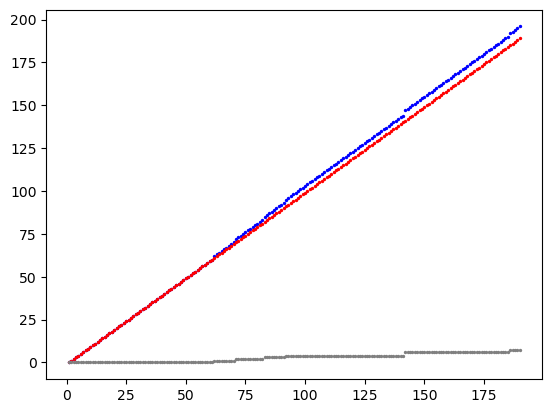

In [33]:
# Look at spill id in flow files/cafs

flow_file = "/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun6.1_1E19_RHC/MiniRun6.1_1E19_RHC.flow/FLOW/0000000/MiniRun6.1_1E19_RHC.flow.0000004.FLOW.hdf5"
flow_file_number = int(flow_file.split("/")[-1].split(".")[-3])
print("Flow file number: ",flow_file_number)

f = h5py.File(flow_file, 'r')

print("Keys: %s" % f.keys())

charge = f['charge/events/data']
print("MC Truth: ",f['mc_truth'].keys())
mc_truth = f['mc_truth/trajectories/data']
print("MC Truth Trajectories Dtype Names: ",mc_truth.dtype.names)
print("Charge Dtype Names: ",charge.dtype.names)
charge_event_ids = charge['id']
mc_truth_event_ids = mc_truth['event_id']
mc_truth_interactions = f['mc_truth/interactions/data']
print("MC Truth Interactions: ",mc_truth_interactions.dtype.names)
mc_truth_interactions_event_id = mc_truth_interactions['event_id']
print(len(mc_truth_interactions_event_id))

#plt.scatter(charge_event_ids, mc_truth_event_ids, color='red')
print("Number of charge event ids:", len(charge_event_ids))
print("Number of MC truth event ids:", len(np.unique(mc_truth_event_ids)))
#plt.scatter(mc_truth_event_ids, color='blue')

y_axis = np.linspace(1,190, 190)
print(len(y_axis))

plt.scatter(y_axis, np.unique(mc_truth_interactions_event_id)-4000, color='blue', s=2)
plt.scatter(y_axis, charge_event_ids, color='red', s=2)

plt.scatter(y_axis, np.unique(mc_truth_interactions_event_id)-4000-charge_event_ids, color='grey', s=2)






In [106]:
flow_file = "/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun6.1_1E19_RHC/MiniRun6.1_1E19_RHC.flow/FLOW/0000000/MiniRun6.1_1E19_RHC.flow.0000004.FLOW.hdf5"
file_number = flow_file.split("/")[-1].split(".")[-3]
file_number_int = int(file_number)

events = f['charge/events/data']
mc_truth_ixns = f['mc_truth/interactions/data']
raw_events = f['charge/raw_events/data']
             
TypeErrorruth_ev_id = 120 + file_number_int*1000

raw_events_ref = f['charge/raw_events/ref/charge/events/ref']
raw_events_region = f['charge/raw_events/ref/charge/events/ref_region']

mc_truth_ixn_ref = f['charge/raw_events/ref/mc_truth/interactions/ref']
mc_truth_ev_id_idx = np.where(mc_truth_ixns['event_id'] == truth_ev_id)[0]
mc_truth_ixn_ref_for_ixn = np.zeros(len(truth_ev_id_idx), dtype=int)
raw_event_ref_from_mc_truth = np.zeros(len(truth_ev_id_idx), dtype=int)
for i in range(len(truth_ev_id_idx)):

    ev_id_idx = truth_ev_id_idx[i]
    #print("Event ID Index: ",ev_id_idx)
    #print(np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1]))
    mc_truth_ixn_ref_for_ixn[i] = mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1]
    raw_event_ref_from_mc_truth[i] = mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx, 0]

raw_event_ref_from_mc_truth = np.unique(raw_event_ref_from_mc_truth)
#print("Raw event ref from MC Truth: ",raw_event_ref_from_mc_truth)
mc_truth_ixn_id = mc_truth_ixns[mc_truth_ixn_ref_for_ixn]['event_id']
#print("MC Truth Interaction ID: ",mc_truth_ixn_id)
raw_event_id = raw_events[raw_event_ref_from_mc_truth]['id'][0]
#print("Raw Event ID: ",raw_event_id)

raw_event_ref = raw_events_ref[raw_events_region[raw_event_id,'start']:raw_events_region[raw_event_id,'stop']]
raw_event_ref_for_raw_event = np.sort(raw_event_ref[raw_event_ref[:,0] == raw_event_id, 1])
raw_event_ref_for_event = np.sort(raw_event_ref[raw_event_ref[:,0] == raw_event_id, 0])
event_id = events[raw_event_ref_for_raw_event]['id'][0]
print("Event ID: ",event_id)


'''#print("Truth Event IDx: ",truth_ev_id_idx)

mc_truth_ixn_ref = mc_truth_ixns_ref#[mc_truth_ixns_region[truth_ev_id_idx[0],'start']:mc_truth_ixns_region[truth_ev_id[-1],'stop']]
mc_truth_ixn_ref_for_ixn = np.zeros(len(truth_ev_id_idx), dtype=int)
print(mc_truth_ixn_ref[:, 1])
print(sum(mc_truth_ixn_ref[:,1] == 528))
mask = mc_truth_ixn_ref[:,1] == 528
print(len(mask))
#print(mc_truth_ixn_ref[:, 0])
#print(mc_truth_ixns_ref[mc_truth_ixns_ref[:,1] is in truth_ev_id_idx, 0])
#print(np.shape(mc_truth_ixns_ref))
raw_event_ref_from_mc_truth = np.zeros(len(truth_ev_id_idx), dtype=int)
for i in range(len(truth_ev_id_idx)):

    ev_id_idx = truth_ev_id_idx[i]
    print("Event ID Index: ",ev_id_idx)
    print(np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1]))
    mc_truth_ixn_ref_for_ixn[i] = np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1])
    raw_event_ref_from_mc_truth[i] = np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx, 0])

mc_truth_ixn_ref = mc_truth_ixn_ref[truth_ev_id_idx]
print("MC Truth Interaction Ref: ",mc_truth_ixn_ref_for_ixn)

raw_event_ref_from_mc_truth = np.unique(raw_event_ref_from_mc_truth)
print("Raw event ref from MC Truth: ",raw_event_ref_from_mc_truth)
mc_truth_ixn_id = mc_truth_ixns[mc_truth_ixn_ref_for_ixn]['event_id']
print("MC Truth Interaction ID: ",mc_truth_ixn_id)
raw_event_id = raw_events[raw_event_ref_from_mc_truth]['id'][0]
print("Raw Event ID: ",raw_event_id)

raw_event_ref = raw_events_ref[raw_events_region[raw_event_id,'start']:raw_events_region[raw_event_id,'stop']]
raw_event_ref_for_raw_event = np.sort(raw_event_ref[raw_event_ref[:,0] == raw_event_id, 1])
raw_event_ref_for_event = np.sort(raw_event_ref[raw_event_ref[:,0] == raw_event_id, 0])
event_id = events[raw_event_ref_for_raw_event]['id'][0]
print("Event ID: ",event_id)



#                raw_event_ref = np.sort(raw_event_ref[raw_event_ref[:,1] == ev_id, 1])
#                raw_event_id = raw_events[raw_event_ref]['id']
#
#                raw_hit_ref = raw_hits_ref[raw_hits_region[ev_id,'start']:raw_hits_region[ev_id,'stop']]
#                raw_hit_ref = np.sort(raw_hit_ref[raw_hit_ref[:,0] == raw_event_id, 1])
#                packet_ref = packets_ref[raw_hit_ref]
#                packet_ref = np.sort(packet_ref[:, 1])
#                #hits = hits_full[hit_ref]
#                #print(hit_ref)
#                #print(raw_hits_ref)
#                #raw_hit_ref = raw_hits_ref
#                #print(hits_ref)
#                #print(np.sort(np.array(hits_ref)))
#                #raw_hit_ref = np.sort(np.array(raw_hit_ref[raw_hit_ref[:,0]!=0]))
#                #print("Raw hit ref: ", raw_hit_ref)
#                packets = packets_full[packet_ref]'''

Event ID:  116


/tmp/ipykernel_1919853/3763088777.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mc_truth_ixn_ref_for_ixn[i] = mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1]
/tmp/ipykernel_1919853/3763088777.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  raw_event_ref_from_mc_truth[i] = mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx, 0]


'#print("Truth Event IDx: ",truth_ev_id_idx)\n\nmc_truth_ixn_ref = mc_truth_ixns_ref#[mc_truth_ixns_region[truth_ev_id_idx[0],\'start\']:mc_truth_ixns_region[truth_ev_id[-1],\'stop\']]\nmc_truth_ixn_ref_for_ixn = np.zeros(len(truth_ev_id_idx), dtype=int)\nprint(mc_truth_ixn_ref[:, 1])\nprint(sum(mc_truth_ixn_ref[:,1] == 528))\nmask = mc_truth_ixn_ref[:,1] == 528\nprint(len(mask))\n#print(mc_truth_ixn_ref[:, 0])\n#print(mc_truth_ixns_ref[mc_truth_ixns_ref[:,1] is in truth_ev_id_idx, 0])\n#print(np.shape(mc_truth_ixns_ref))\nraw_event_ref_from_mc_truth = np.zeros(len(truth_ev_id_idx), dtype=int)\nfor i in range(len(truth_ev_id_idx)):\n\n    ev_id_idx = truth_ev_id_idx[i]\n    print("Event ID Index: ",ev_id_idx)\n    print(np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1]))\n    mc_truth_ixn_ref_for_ixn[i] = np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx,  1])\n    raw_event_ref_from_mc_truth[i] = np.sort(mc_truth_ixn_ref[mc_truth_ixn_ref[:,1] == ev_id_idx, 0])

In [ ]:
        hits_ref = f['charge/events/ref/charge/'+hits_dset+'/ref']
        hits_region = f['charge/events/ref/charge/'+hits_dset+'/ref_region']
        total_events += len(events)
        if beam==True:
            total_beam_events += len(beam_events)
        if not simulation==True:
            packets_full = f['charge/packets/data']
            #packets_ref = f['charge/'+hits_dset+'/ref/charge/packets/ref']
            # MODULE 0 ONLY :
            raw_events = f['charge/raw_events/data']
            raw_events_ref = f['charge/raw_events/ref/charge/events/ref']
            raw_events_region = f['charge/raw_events/ref/charge/events/ref_region']
            raw_hits_ref = f['charge/raw_events/ref/charge/hits/ref']
            raw_hits = f['charge/raw_events/data']
            raw_hits_region = f['charge/raw_events/ref/charge/hits/ref_region']
            packets_ref = f['charge/raw_hits/ref/charge/packets/ref']
            packets_region = f['charge/raw_hits/ref/charge/packets/ref_region']

                raw_event_ref = raw_events_ref[raw_events_region[ev_id,'start']:raw_events_region[ev_id,'stop']]
                raw_event_ref = np.sort(raw_event_ref[raw_event_ref[:,1] == ev_id, 1])
                raw_event_id = raw_events[raw_event_ref]['id']

                raw_hit_ref = raw_hits_ref[raw_hits_region[ev_id,'start']:raw_hits_region[ev_id,'stop']]
                raw_hit_ref = np.sort(raw_hit_ref[raw_hit_ref[:,0] == raw_event_id, 1])
                packet_ref = packets_ref[raw_hit_ref]
                packet_ref = np.sort(packet_ref[:, 1])
                #hits = hits_full[hit_ref]
                #print(hit_ref)
                #print(raw_hits_ref)
                #raw_hit_ref = raw_hits_ref
                #print(hits_ref)
                #print(np.sort(np.array(hits_ref)))
                #raw_hit_ref = np.sort(np.array(raw_hit_ref[raw_hit_ref[:,0]!=0]))
                #print("Raw hit ref: ", raw_hit_ref)
                packets = packets_full[packet_ref]